# Loading the dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('./climate_change_data.csv',parse_dates=['Date'])
df.head()

Date          Location        Country  Temperature  \
0 2000-01-01 00:00:00.000000000   New Williamtown         Latvia    10.688986   
1 2000-01-01 20:09:43.258325832      North Rachel   South Africa    13.814430   
2 2000-01-02 16:19:26.516651665  West Williamland  French Guiana    27.323718   
3 2000-01-03 12:29:09.774977497       South David        Vietnam    12.309581   
4 2000-01-04 08:38:53.033303330    New Scottburgh        Moldova    13.210885   

   CO2 Emissions  Sea Level Rise  Precipitation   Humidity  Wind Speed  
0     403.118903        0.717506      13.835237  23.631256   18.492026  
1     396.663499        1.205715      40.974084  43.982946   34.249300  
2     451.553155       -0.160783      42.697931  96.652600   34.124261  
3     422.404983       -0.475931       5.193341  47.467938    8.554563  
4     410.472999        1.135757      78.695280  61.789672    8.001164

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            10000 non-null  datetime64[ns]
 1   Location        10000 non-null  object        
 2   Country         10000 non-null  object        
 3   Temperature     10000 non-null  float64       
 4   CO2 Emissions   10000 non-null  float64       
 5   Sea Level Rise  10000 non-null  float64       
 6   Precipitation   10000 non-null  float64       
 7   Humidity        10000 non-null  float64       
 8   Wind Speed      10000 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 703.2+ KB


#### Descriptive statistics

In [4]:
df.describe()

Temperature  CO2 Emissions  Sea Level Rise  Precipitation  \
count  10000.000000   10000.000000    10000.000000   10000.000000   
mean      14.936034     400.220469       -0.003152      49.881208   
std        5.030616      49.696933        0.991349      28.862417   
min       -3.803589     182.131220       -4.092155       0.010143   
25%       11.577991     367.109330       -0.673809      24.497516   
50%       14.981136     400.821324        0.002332      49.818967   
75%       18.305826     433.307905        0.675723      74.524991   
max       33.976956     582.899701        4.116559      99.991900   

           Humidity    Wind Speed  
count  10000.000000  10000.000000  
mean      49.771302     25.082066  
std       28.929320     14.466648  
min        0.018998      0.001732  
25%       24.713250     12.539733  
50%       49.678412     24.910787  
75%       75.206390     37.670260  
max       99.959665     49.997664

In [5]:
df.shape

(10000, 9)

##### Null percentage

In [6]:
df.isnull().mean()*100

Date              0.0
Location          0.0
Country           0.0
Temperature       0.0
CO2 Emissions     0.0
Sea Level Rise    0.0
Precipitation     0.0
Humidity          0.0
Wind Speed        0.0
dtype: float64

##### Checking for duplicated values

In [7]:
df.duplicated().sum()

0

In [8]:
df.sort_values(by='Date',inplace=True)

In [9]:
df.head()

Date          Location        Country  Temperature  \
0 2000-01-01 00:00:00.000000000   New Williamtown         Latvia    10.688986   
1 2000-01-01 20:09:43.258325832      North Rachel   South Africa    13.814430   
2 2000-01-02 16:19:26.516651665  West Williamland  French Guiana    27.323718   
3 2000-01-03 12:29:09.774977497       South David        Vietnam    12.309581   
4 2000-01-04 08:38:53.033303330    New Scottburgh        Moldova    13.210885   

   CO2 Emissions  Sea Level Rise  Precipitation   Humidity  Wind Speed  
0     403.118903        0.717506      13.835237  23.631256   18.492026  
1     396.663499        1.205715      40.974084  43.982946   34.249300  
2     451.553155       -0.160783      42.697931  96.652600   34.124261  
3     422.404983       -0.475931       5.193341  47.467938    8.554563  
4     410.472999        1.135757      78.695280  61.789672    8.001164

In [10]:
df.Location.nunique()

7764

In [11]:
df.Country.nunique()

243

Highest Temperature recorded

In [12]:
df.nlargest(1,'Temperature')

Date     Location Country  Temperature  \
5601 2012-11-18 07:27:09.882988288  Bradleyport   Niger    33.976956   

      CO2 Emissions  Sea Level Rise  Precipitation   Humidity  Wind Speed  
5601     370.009529       -1.173126      53.160033  47.798918    16.57178

Lowest CO2 Emission recorded

In [13]:
df.nsmallest(1,'CO2 Emissions')

Date     Location Country  Temperature  \
9888 2022-09-28 18:00:58.325832576  Jenniferton  Kuwait    14.278908   

      CO2 Emissions  Sea Level Rise  Precipitation   Humidity  Wind Speed  
9888      182.13122       -0.510499       87.96908  77.646321   49.649592

Countries with their Sea Level Rise and	Humidity

In [14]:
df1=df.groupby(['Country'])['Sea Level Rise','Humidity'].sum()
df1

Sea Level Rise     Humidity
Country                                       
Afghanistan              4.625520  1887.004520
Albania                -10.560356  2276.758946
Algeria                -14.790861  2074.216377
American Samoa           6.886407  2360.505193
Andorra                 -1.396758  2197.177660
...                           ...          ...
Wallis and Futuna       -0.200759  1624.289802
Western Sahara           0.869924  1896.697809
Yemen                    3.367894  1612.137921
Zambia                  -9.003518  1465.987911
Zimbabwe                -0.437786  1990.609847

[243 rows x 2 columns]

In [15]:
df.columns

Index(['Date', 'Location', 'Country', 'Temperature', 'CO2 Emissions',
       'Sea Level Rise', 'Precipitation', 'Humidity', 'Wind Speed'],
      dtype='object')

Countries  with Sea Level Rise greater then 1

In [16]:
df[df['Sea Level Rise']>1.00]

Date           Location                Country  \
1    2000-01-01 20:09:43.258325832       North Rachel           South Africa   
4    2000-01-04 08:38:53.033303330     New Scottburgh                Moldova   
5    2000-01-05 04:48:36.291629162       South Nathan           Saint Helena   
14   2000-01-12 18:16:05.616561656          Adammouth                  Samoa   
19   2000-01-16 23:04:41.908190819         Bakerburgh                   Mali   
...                            ...                ...                    ...   
9984 2022-12-18 09:34:11.125112448        Lake Carrie                 Guinea   
9988 2022-12-21 18:13:04.158415744         New Sandra                Algeria   
9993 2022-12-25 23:01:40.450044928       South Joseph               Cameroon   
9997 2022-12-29 07:40:33.483348224     West Stephanie              Argentina   
9999 2022-12-31 00:00:00.000000000  West Anthonyburgh  Sao Tome and Principe   

      Temperature  CO2 Emissions  Sea Level Rise  Precipitation   Humidity  \
1       13.814430     396.663499        1.205715      40.974084  43.982946   
4       13.210885     410.472999        1.135757      78.695280  61.789672   
5        6.229326     392.473317        1.122210      76.368331  48.973886   
14      17.060978     503.450873        1.281870      80.918947  24.796890   
19      10.874589     415.608633        1.218314      57.990681  15.764407   
...           ...            ...             ...            ...        ...   
9984    16.667292     344.052935        1.805269      45.743847  63.234356   
9988    15.292410     363.940234        1.092427      38.633572  50.161462   
9993    17.667267     423.686881        1.033963      66.063186  35.660745   
9997    22.370025     466.042136        1.026704      30.659841  15.211825   
9999    12.661928     381.172746        2.260788      78.339658  99.243923   

      Wind Speed  
1      34.249300  
4       8.001164  
5      30.398908  
14     17.094477  
19     10.098797  
...          ...  
9984    8.675356  
9988   45.363407  
9993   12.749542  
9997   18.293708  
9999   41.856539  

[1564 rows x 9 columns]

In [17]:
df.columns

Index(['Date', 'Location', 'Country', 'Temperature', 'CO2 Emissions',
       'Sea Level Rise', 'Precipitation', 'Humidity', 'Wind Speed'],
      dtype='object')

Renaming columns

In [18]:
df.rename(columns={'CO2 Emissions':"Co2_emissions", 'Wind Speed':'wind_speed', 'Sea Level Rise':'Sea_Level_Rise'}, inplace=True)
df.head()

Date          Location        Country  Temperature  \
0 2000-01-01 00:00:00.000000000   New Williamtown         Latvia    10.688986   
1 2000-01-01 20:09:43.258325832      North Rachel   South Africa    13.814430   
2 2000-01-02 16:19:26.516651665  West Williamland  French Guiana    27.323718   
3 2000-01-03 12:29:09.774977497       South David        Vietnam    12.309581   
4 2000-01-04 08:38:53.033303330    New Scottburgh        Moldova    13.210885   

   Co2_emissions  Sea_Level_Rise  Precipitation   Humidity  wind_speed  
0     403.118903        0.717506      13.835237  23.631256   18.492026  
1     396.663499        1.205715      40.974084  43.982946   34.249300  
2     451.553155       -0.160783      42.697931  96.652600   34.124261  
3     422.404983       -0.475931       5.193341  47.467938    8.554563  
4     410.472999        1.135757      78.695280  61.789672    8.001164

Countries with Sea_Level_Rise > 1.00 & Temperature > 28.00 & Humidity > 20.00

In [19]:
sea_1 = df.query("Sea_Level_Rise > 1.00 & Temperature > 28.00 & Humidity > 20.00")

In [20]:
sea_1

Date          Location           Country  \
877  2002-01-06 18:05:17.551755168   East Meganshire           Bahrain   
2247 2005-03-02 16:03:01.458145792       Martinshire          Slovenia   
3378 2007-10-08 19:17:26.624662464       Deckerville              Mali   
5267 2012-02-11 17:20:21.602160192         Costatown          Slovenia   
7341 2016-11-19 01:21:39.369936960  New Reneeborough            Rwanda   
9228 2021-03-23 07:05:07.830782976       East Lauren           Reunion   
9552 2021-12-20 11:34:43.528352768       Port Yvette  Saint Barthelemy   

      Temperature  Co2_emissions  Sea_Level_Rise  Precipitation   Humidity  \
877     30.556774     283.716379        2.404841      76.699991  80.005142   
2247    29.666437     360.443262        1.321362      60.692435  99.539312   
3378    28.104269     399.025145        1.223600      56.540142  23.394925   
5267    28.296467     445.710770        1.395041       9.835936  26.765792   
7341    30.183415     417.969002        1.529484      49.053406  60.629908   
9228    33.907976     330.584735        1.198054      49.407325  47.492751   
9552    29.747069     405.427817        1.965746      15.926186  59.760575   

      wind_speed  
877    25.268714  
2247   23.445234  
3378   46.150989  
5267   20.382261  
7341   44.847275  
9228    5.970861  
9552   41.209966

In [21]:
#Feature engineering
df['Year']=df.Date.dt.year
df['Month']=df.Date.dt.month
df['Day']=df.Date.dt.day

In [22]:
df.head()

Date          Location        Country  Temperature  \
0 2000-01-01 00:00:00.000000000   New Williamtown         Latvia    10.688986   
1 2000-01-01 20:09:43.258325832      North Rachel   South Africa    13.814430   
2 2000-01-02 16:19:26.516651665  West Williamland  French Guiana    27.323718   
3 2000-01-03 12:29:09.774977497       South David        Vietnam    12.309581   
4 2000-01-04 08:38:53.033303330    New Scottburgh        Moldova    13.210885   

   Co2_emissions  Sea_Level_Rise  Precipitation   Humidity  wind_speed  Year  \
0     403.118903        0.717506      13.835237  23.631256   18.492026  2000   
1     396.663499        1.205715      40.974084  43.982946   34.249300  2000   
2     451.553155       -0.160783      42.697931  96.652600   34.124261  2000   
3     422.404983       -0.475931       5.193341  47.467938    8.554563  2000   
4     410.472999        1.135757      78.695280  61.789672    8.001164  2000   

   Month  Day  
0      1    1  
1      1    1  
2      1    2  
3      1    3  
4      1    4

Latest year recorded in the dataset

In [23]:
df.nlargest(1, 'Year')

Date   Location      Country  Temperature  \
9566 2022-01-01 05:50:49.144914432  Anneshire  Puerto Rico     15.04813   

      Co2_emissions  Sea_Level_Rise  Precipitation   Humidity  wind_speed  \
9566     426.708313       -1.871958      73.368891  78.431812   21.208365   

      Year  Month  Day  
9566  2022      1    1

data of year 2022

In [24]:
data_of_year_2022=df.query("Year==2022")
data_of_year_2022

Date           Location                Country  \
9566 2022-01-01 05:50:49.144914432          Anneshire            Puerto Rico   
9567 2022-01-02 02:00:32.403240320         Bobbymouth                Myanmar   
9568 2022-01-02 22:10:15.661566080        Bradleyfort                 Tuvalu   
9569 2022-01-03 18:19:58.919891968      Alexanderland             Mauritania   
9570 2022-01-04 14:29:42.178217728       South Alyssa                   Oman   
...                            ...                ...                    ...   
9995 2022-12-27 15:21:06.966696576   South Elaineberg                 Bhutan   
9996 2022-12-28 11:30:50.225022464       Leblancville                  Congo   
9997 2022-12-29 07:40:33.483348224     West Stephanie              Argentina   
9998 2022-12-30 03:50:16.741674112        Port Steven                Albania   
9999 2022-12-31 00:00:00.000000000  West Anthonyburgh  Sao Tome and Principe   

      Temperature  Co2_emissions  Sea_Level_Rise  Precipitation   Humidity  \
9566    15.048130     426.708313       -1.871958      73.368891  78.431812   
9567    11.235506     443.728696        0.813752      42.528332  32.507960   
9568    15.986969     376.713789        1.137202      30.937883  85.068081   
9569    14.673414     407.340920        0.837738      93.453042  40.498572   
9570     6.791144     376.344501        0.288591      78.108959  50.565335   
...           ...            ...             ...            ...        ...   
9995    15.020523     391.379537       -1.452243      93.417109  25.293814   
9996    16.772451     346.921190        0.543616      49.882947  96.787402   
9997    22.370025     466.042136        1.026704      30.659841  15.211825   
9998    19.430853     337.899776       -0.895329      18.932275  82.774520   
9999    12.661928     381.172746        2.260788      78.339658  99.243923   

      wind_speed  Year  Month  Day  
9566   21.208365  2022      1    1  
9567   17.492638  2022      1    2  
9568   31.344799  2022      1    2  
9569    6.347788  2022      1    3  
9570   42.204860  2022      1    4  
...          ...   ...    ...  ...  
9995    6.531866  2022     12   27  
9996   42.249014  2022     12   28  
9997   18.293708  2022     12   29  
9998   42.424255  2022     12   30  
9999   41.856539  2022     12   31  

[434 rows x 12 columns]

<Axes: ylabel='Frequency'>

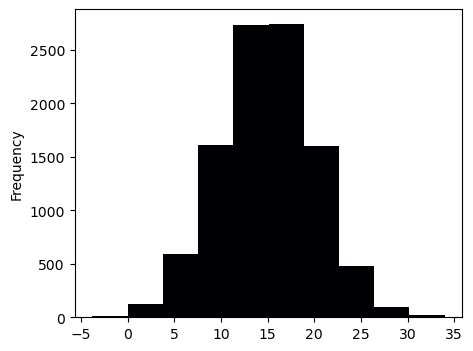

In [25]:
#histogram of temperature column
df.Temperature.plot.hist(figsize=(5,4),cmap='inferno')

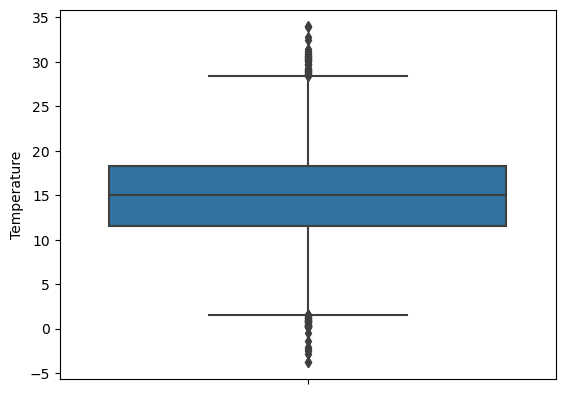

<Figure size 300x300 with 0 Axes>

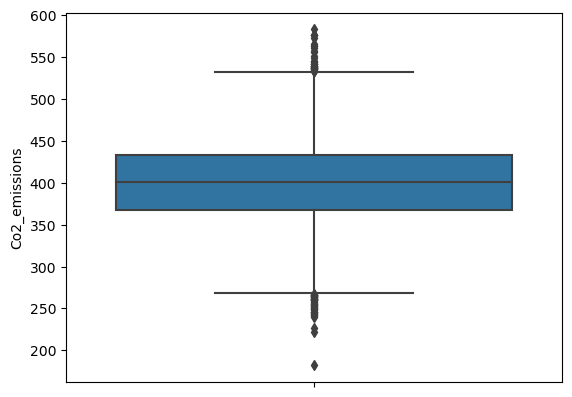

<Figure size 300x300 with 0 Axes>

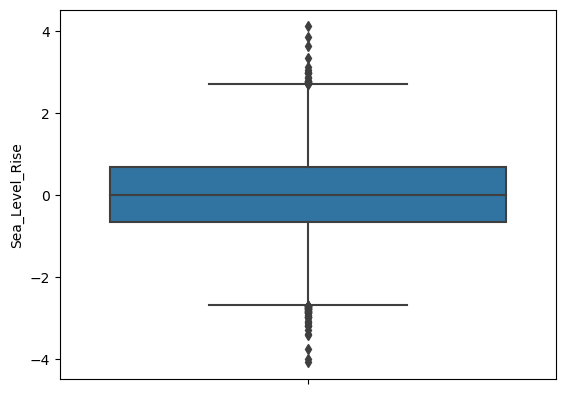

<Figure size 300x300 with 0 Axes>

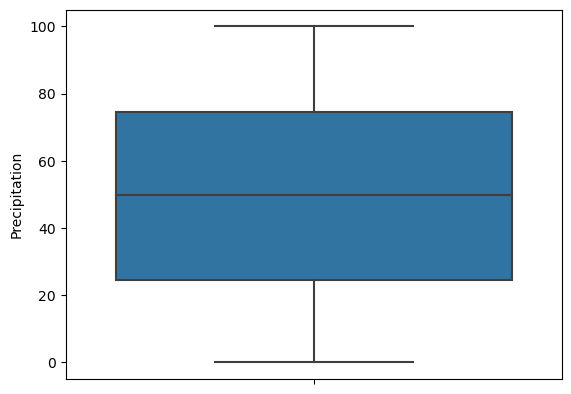

<Figure size 300x300 with 0 Axes>

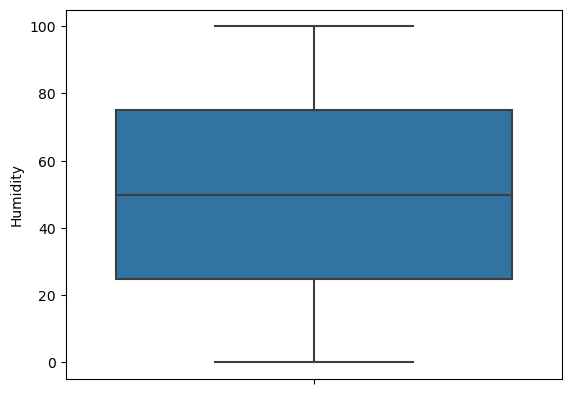

<Figure size 300x300 with 0 Axes>

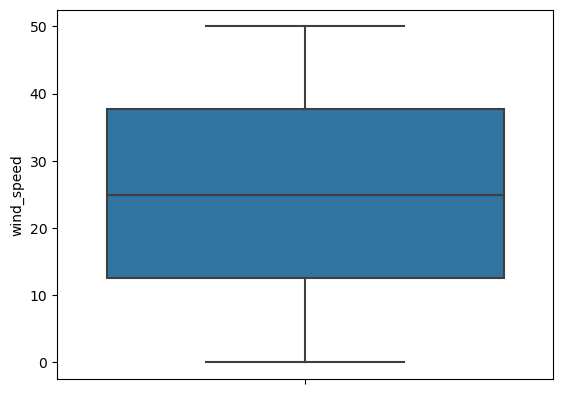

<Figure size 300x300 with 0 Axes>

In [26]:
#boxplot of float datatype columns
for i in df.columns:
    if df[i].dtypes =='float':
        sns.boxplot(y= df[i])
        plt.figure(figsize=(3,3))
        plt.show()

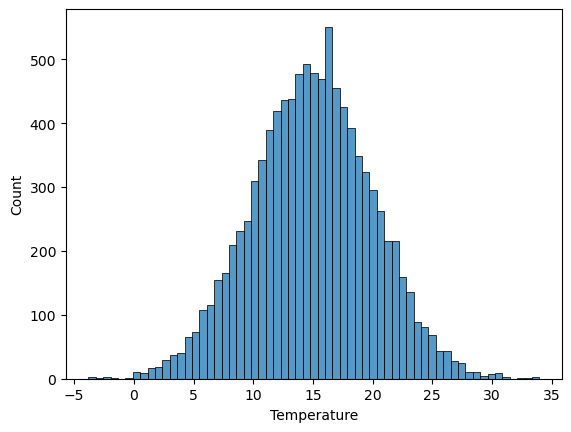

<Figure size 300x300 with 0 Axes>

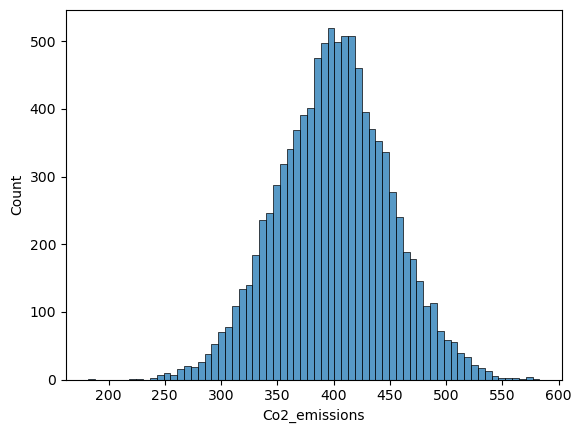

<Figure size 300x300 with 0 Axes>

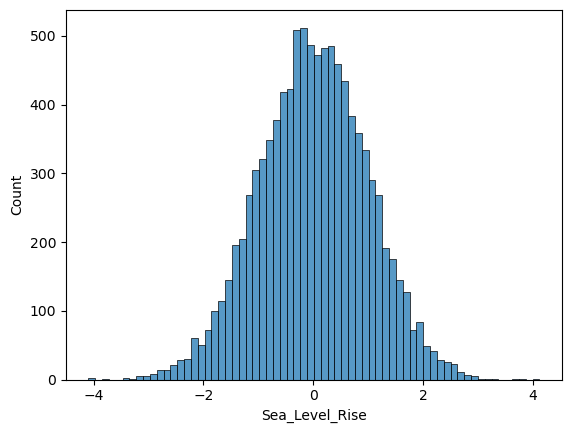

<Figure size 300x300 with 0 Axes>

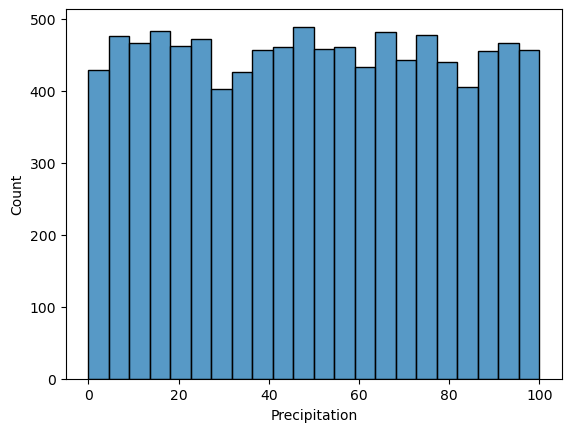

<Figure size 300x300 with 0 Axes>

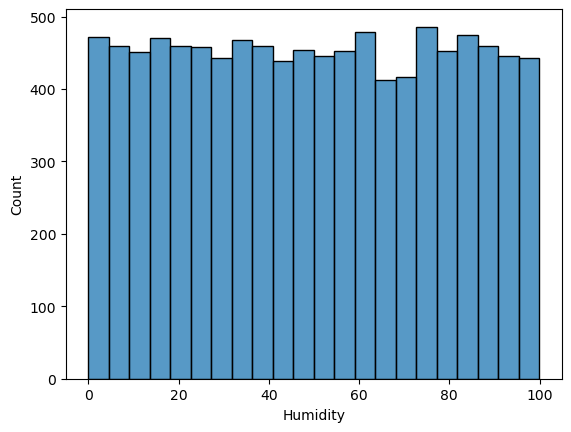

<Figure size 300x300 with 0 Axes>

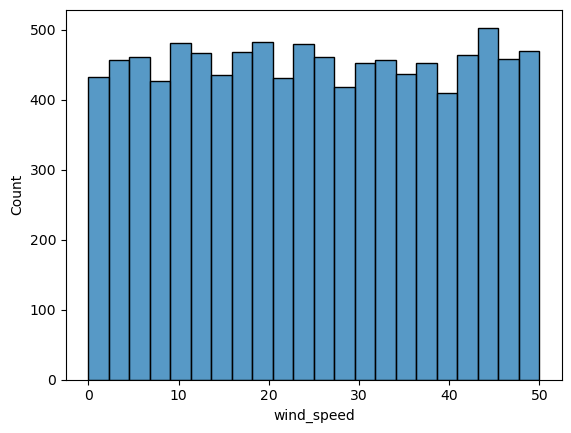

<Figure size 300x300 with 0 Axes>

In [27]:
for i in df.columns:
    if df[i].dtypes =='float':
        sns.histplot(x= df[i])
        plt.figure(figsize=(3,3))
        plt.show()

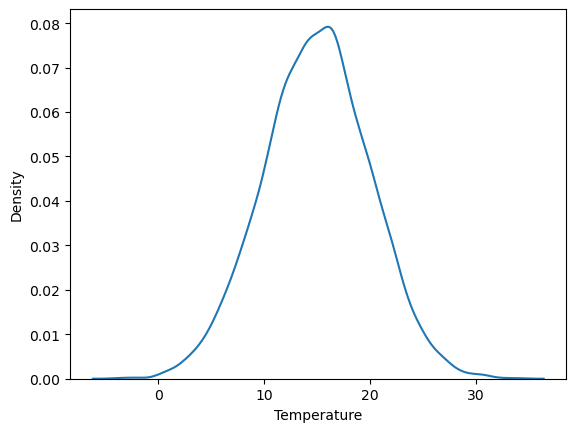

<Figure size 200x200 with 0 Axes>

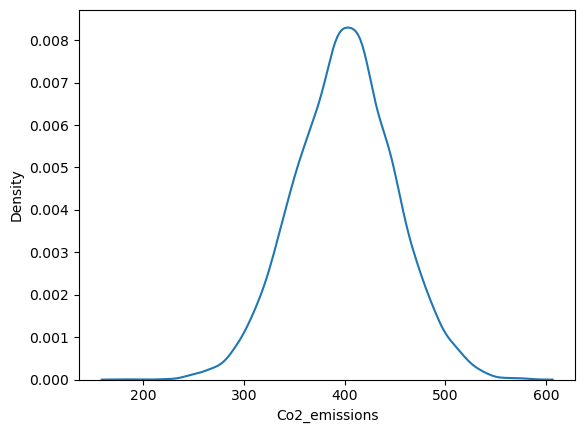

<Figure size 200x200 with 0 Axes>

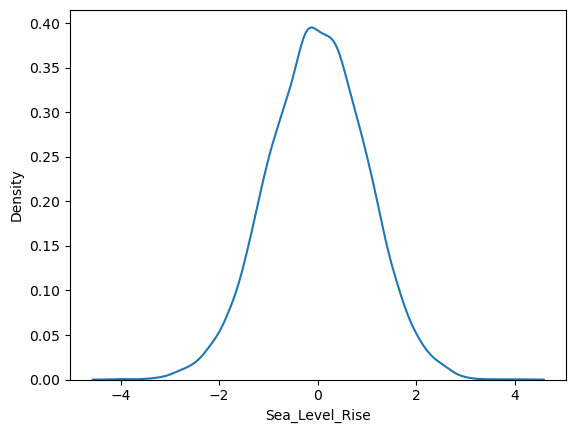

<Figure size 200x200 with 0 Axes>

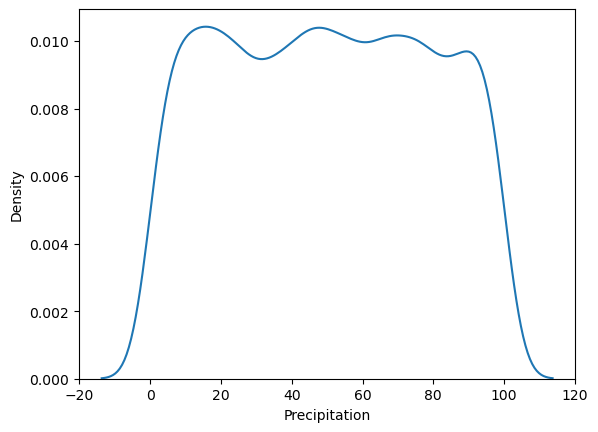

<Figure size 200x200 with 0 Axes>

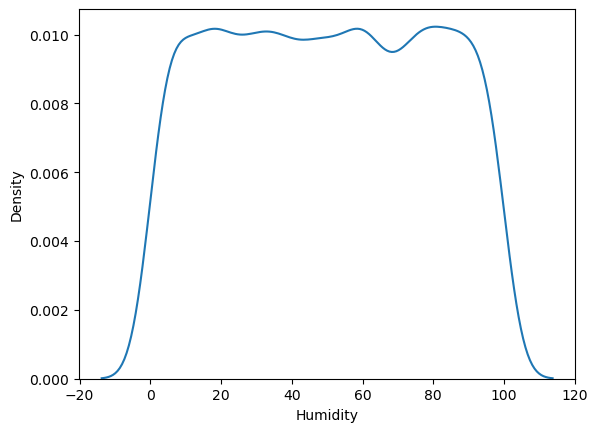

<Figure size 200x200 with 0 Axes>

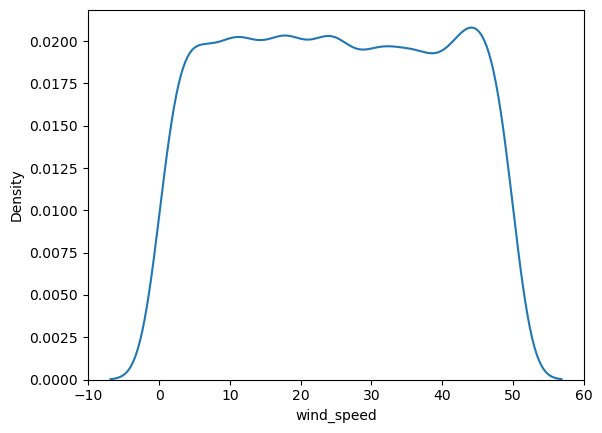

<Figure size 200x200 with 0 Axes>

In [28]:
#kdeplot of float columns
for i in df.columns:
    if df[i].dtypes =='float':
        sns.kdeplot(x= df[i])
        plt.figure(figsize=(2,2))
        plt.show()

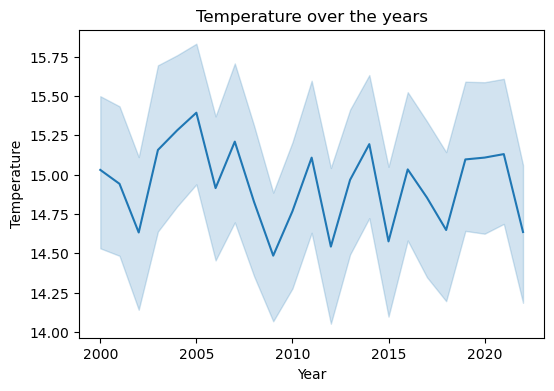

In [29]:
plt.figure(figsize=(6,4))
sns.lineplot(data=df, x='Year', y='Temperature')
plt.title("Temperature over the years")
plt.show()

In [30]:
data_of_year_2022_temp=data_of_year_2022.groupby(['Temperature']).sum()
data_of_year_2022_temp=data_of_year_2022_temp.sort_values(by='Temperature',ascending=True)

In [31]:
data_of_year_2022_temp

Co2_emissions  Sea_Level_Rise  Precipitation   Humidity  \
Temperature                                                            
0.312122        509.055715        0.949686      12.243613  35.330934   
0.808376        375.318337       -0.885636      79.775804  35.399347   
0.965606        439.634020       -1.206441      38.442200  46.607595   
1.200466        463.817745       -0.541626      93.540039  40.934586   
2.318023        429.140629        2.080868       8.006712  53.724569   
...                    ...             ...            ...        ...   
24.254428       444.564275        0.132700      58.937408  57.042141   
24.481707       360.737534        0.061808      60.056036  69.672986   
24.740330       344.633758       -0.184930      63.597126  28.335890   
25.615691       376.023605       -0.484357      86.299702  10.690664   
25.776005       518.372832       -1.564742       0.170750  75.547285   

             wind_speed  Year  Month  Day  
Temperature                                
0.312122       7.908784  2022      5   17  
0.808376      23.927837  2022      7   31  
0.965606      26.608428  2022      1   19  
1.200466      39.184357  2022     10   24  
2.318023      37.785902  2022      7   22  
...                 ...   ...    ...  ...  
24.254428     22.289126  2022     12   22  
24.481707     44.402729  2022      4    7  
24.740330      6.376373  2022      2   16  
25.615691     10.199765  2022      2   14  
25.776005     15.944431  2022      6   14  

[434 rows x 8 columns]

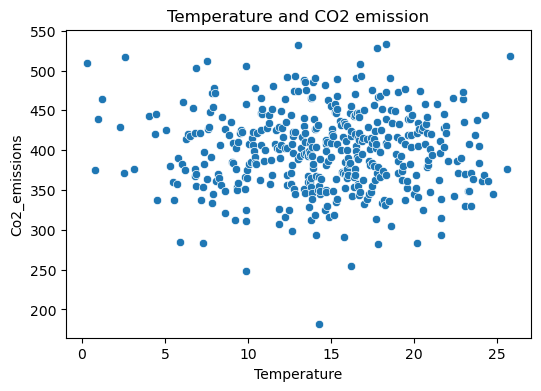

In [32]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=data_of_year_2022_temp,x='Temperature',y='Co2_emissions')
plt.title("Temperature and CO2 emission")
plt.show()

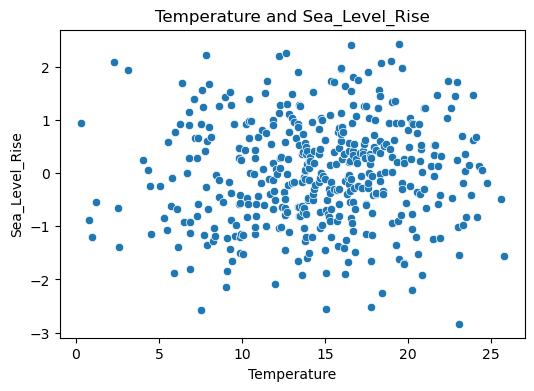

In [33]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=data_of_year_2022_temp,x='Temperature',y='Sea_Level_Rise')
plt.title("Temperature and Sea_Level_Rise")
plt.show()

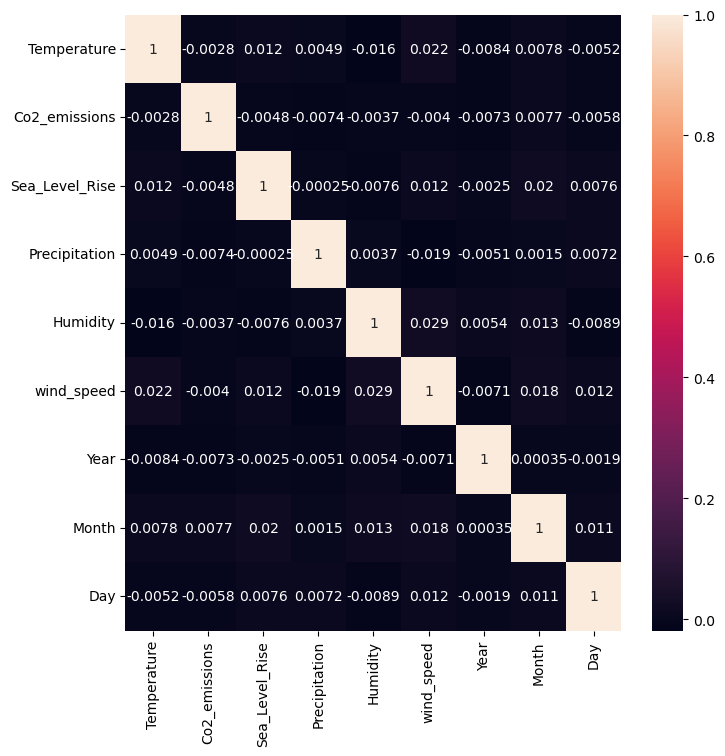

In [34]:
#Heatmap 
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [35]:
#Data of India
india_wise_data=df.query("Country == 'India'")
india_wise_data.drop(columns=['Date'],inplace=True)
india_wise_data

Location Country  Temperature  Co2_emissions  \
44             Stewartbury   India    13.863784     408.121863   
153             Port Jesus   India    14.563792     441.458510   
420           Lake Heather   India     8.050407     352.500027   
604        Port Haydentown   India    12.435437     380.040060   
626             Marisafort   India    19.580143     412.246774   
754              Jacobland   India    18.290347     312.602899   
764    South Kimberlyshire   India    12.013457     334.323596   
1437             New David   India     8.794670     352.886364   
2589      South Robertstad   India    18.649079     417.644878   
2805            Bowersfurt   India    15.702748     462.738893   
3217            Aliciaview   India    17.222168     342.906534   
3403      North Laurieside   India    15.904627     354.901698   
3548           Francisberg   India    19.211249     352.322940   
3555             Masonfort   India    15.391247     449.799677   
4185      Lake Sandrashire   India    18.342157     415.020313   
4309            Oliverside   India    11.243023     397.590335   
4358            Payneville   India    15.647535     418.629962   
5002            Keithmouth   India     6.834645     445.085225   
5199            Philipstad   India    18.756186     393.825370   
5377       Port Tonyamouth   India    13.819740     370.274955   
5443           South Jacob   India    13.756413     428.590540   
5856            Lake James   India    12.507289     455.611153   
5873            New Rachel   India    21.685629     486.868858   
5905      New Kathleenfurt   India    17.133907     431.969586   
5994              Evanport   India     7.514150     330.623113   
6079      West Williemouth   India    12.255525     455.327197   
6472         Jennifermouth   India    10.466862     357.520635   
6970      West Alyssaburgh   India    13.556874     397.459411   
7182           Williamfort   India    13.956852     388.803615   
7261           Lake Daniel   India    12.381219     435.000744   
7993             Davidbury   India     6.770180     285.499915   
8139             Reneebury   India    16.018688     384.248765   
8151        East Christina   India    14.645818     504.731648   
9302  South Patrickchester   India    12.843373     334.385335   
9589      West Nicoleburgh   India    19.057824     386.084043   
9713              Longview   India     9.903226     458.566159   

      Sea_Level_Rise  Precipitation   Humidity  wind_speed  Year  Month  Day  
44         -0.078811      77.498661  31.356005   26.264121  2000      2    6  
153         0.012392      72.783893  64.897858   44.925654  2000      5    8  
420        -1.081892      85.429837  90.573097   33.954562  2000     12   18  
604        -0.376124      92.218718   7.455810   41.320736  2001      5   22  
626         1.490122      55.683053  63.584592   44.651892  2001      6    9  
754        -0.556386      29.791763  29.240185   47.933234  2001      9   25  
764        -0.046268      55.820262  98.889572   32.544557  2001     10    3  
1437       -0.773098      98.618001  99.591771   49.080657  2003      4   22  
2589       -0.488305      74.032718  20.658963   43.859921  2005     12   14  
2805       -1.027062      67.324433  39.692066   27.317580  2006      6   14  
3217       -0.509245      62.577881  48.914960   28.376891  2007      5   26  
3403        1.164165      36.515595  80.880970   38.284059  2007     10   29  
3548       -0.808938      99.328597  77.138614    3.989319  2008      2   28  
3555       -0.924855      37.530240  80.239737   38.258343  2008      3    5  
4185        0.815616      85.144267  91.182500    2.692060  2009      8   16  
4309       -0.095128      64.807298  73.685582    4.906028  2009     11   28  
4358        1.021754      21.914709  93.764604   20.295536  2010      1    9  
5002       -0.480513      58.788707  61.433921    9.596664  2011      7    4  
5199       -1.813955      82.425810   1.077511   45.380062  2011     12   

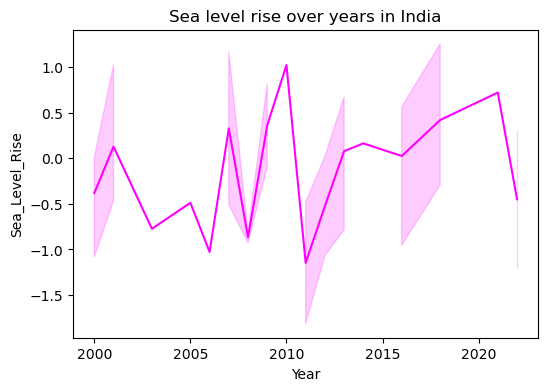

In [36]:
plt.figure(figsize=(6,4))
sns.lineplot(data=india_wise_data, x='Year',y='Sea_Level_Rise',color='magenta')
plt.title("Sea level rise over years in India")
plt.show()

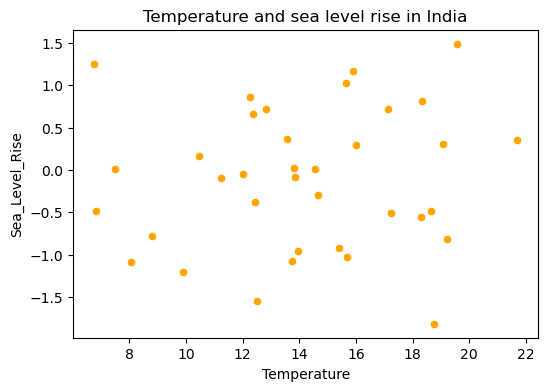

In [37]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=india_wise_data, x='Temperature',y='Sea_Level_Rise',color='orange')
plt.title("Temperature and sea level rise in India")
plt.show()

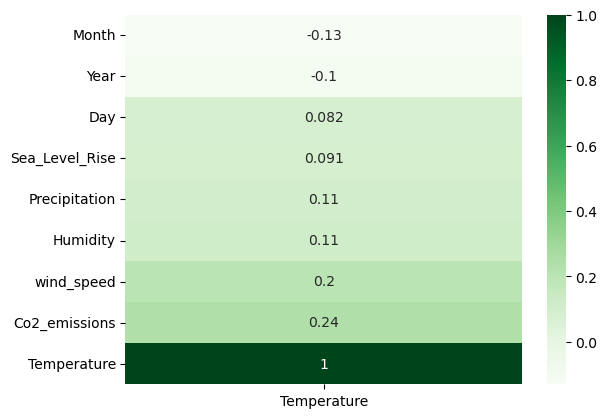

In [38]:
#heatmap of india wise data 
sns.heatmap(india_wise_data.corr()[["Temperature"]].sort_values(by="Temperature"),annot=True,cmap='Greens')
plt.plot();

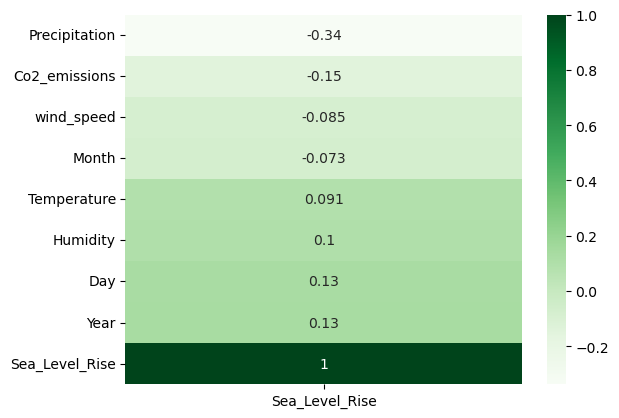

In [39]:
sns.heatmap(india_wise_data.corr()[["Sea_Level_Rise"]].sort_values(by="Sea_Level_Rise"),annot=True,cmap='Greens')
plt.plot();

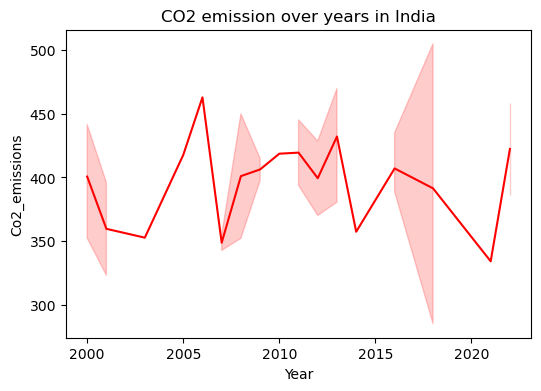

In [40]:
plt.figure(figsize=(6,4))
sns.lineplot(data=india_wise_data,x='Year',y= 'Co2_emissions',color='red')
plt.title("CO2 emission over years in India")
plt.show()

In [41]:
india_wise_data_speed=india_wise_data.sort_values(by='wind_speed')

In [42]:
india_wise_data_speed_nlargest = india_wise_data_speed.nlargest(5, 'wind_speed')

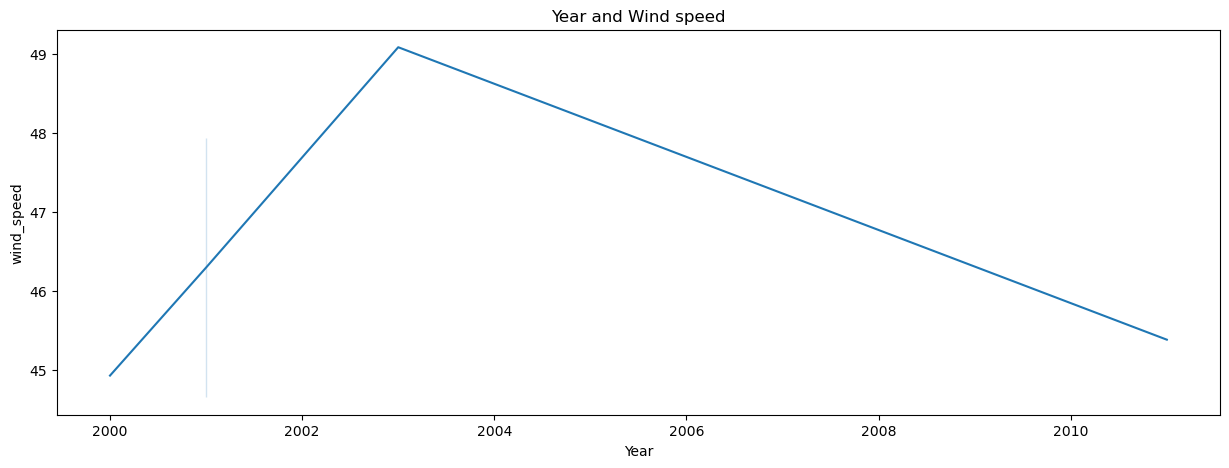

In [43]:
plt.figure(figsize=(15,5))
sns.lineplot(data=india_wise_data_speed_nlargest,x='Year',y='wind_speed')
plt.title("Year and Wind speed")
plt.show()

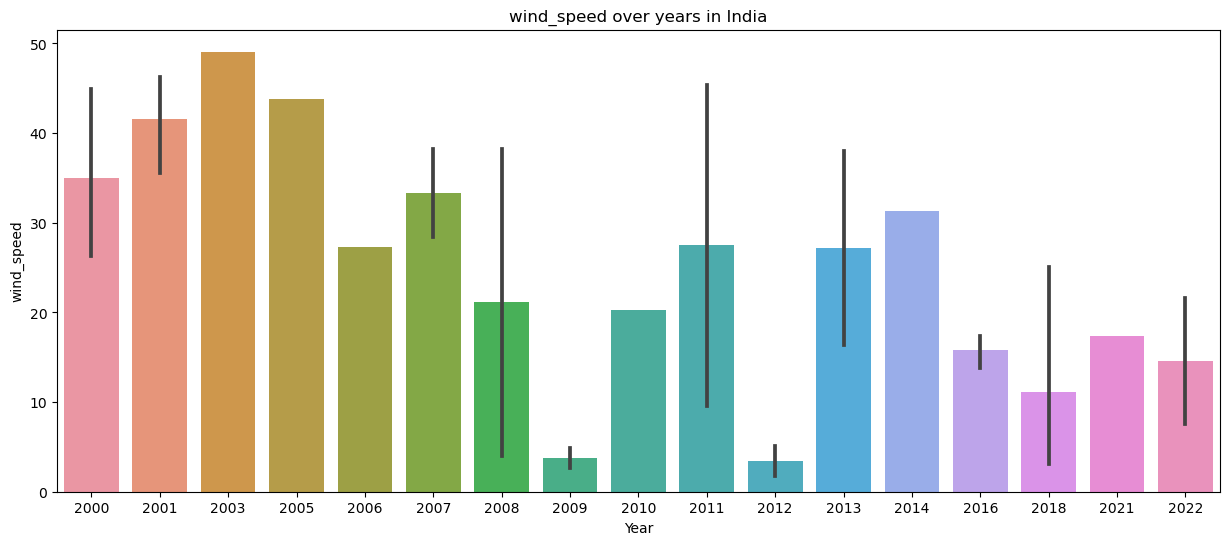

In [44]:
plt.figure(figsize=(15,6))
sns.barplot(data=india_wise_data,x='Year',y='wind_speed')
plt.title("wind_speed over years in India")
plt.show()

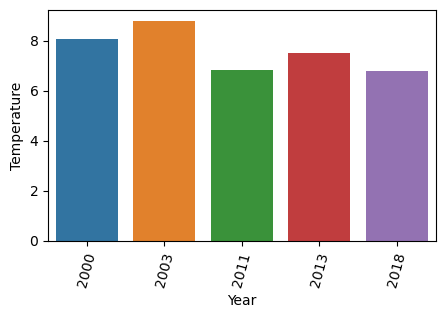

In [45]:
# five smallest temperature in india over the years
f=india_wise_data.sort_values(by='Temperature')[:5]
h=f.nsmallest(5,'Temperature')
plt.figure(figsize=(5,3))
plt.xticks(rotation=75)
sns.barplot(data=h,x='Year',y='Temperature')
plt.show()

In [46]:
temp_mean=india_wise_data.groupby(['Temperature']).mean()
temp_mean

Co2_emissions  Sea_Level_Rise  Precipitation   Humidity  \
Temperature                                                            
6.770180        285.499915        1.255241      32.294763   3.406655   
6.834645        445.085225       -0.480513      58.788707  61.433921   
7.514150        330.623113        0.010152      16.569574   1.542091   
8.050407        352.500027       -1.081892      85.429837  90.573097   
8.794670        352.886364       -0.773098      98.618001  99.591771   
9.903226        458.566159       -1.206748      57.588559  44.788664   
10.466862       357.520635        0.162902      55.520724  51.620906   
11.243023       397.590335       -0.095128      64.807298  73.685582   
12.013457       334.323596       -0.046268      55.820262  98.889572   
12.255525       455.327197        0.856938       0.094976  63.672917   
12.381219       435.000744        0.661026      90.428662  36.548985   
12.435437       380.040060       -0.376124      92.218718   7.455810   
12.507289       455.611153       -1.548433      50.978074  68.468980   
12.843373       334.385335        0.720205      38.213156  44.658542   
13.556874       397.459411        0.366069      58.008503  41.125659   
13.756413       428.590540       -1.068654      29.921225  62.646056   
13.819740       370.274955        0.018518      15.817714  83.809610   
13.863784       408.121863       -0.078811      77.498661  31.356005   
13.956852       388.803615       -0.954000      88.713444  83.131379   
14.563792       441.458510        0.012392      72.783893  64.897858   
14.645818       504.731648       -0.292160      69.741480  56.546109   
15.391247       449.799677       -0.924855      37.530240  80.239737   
15.647535       418.629962        1.021754      21.914709  93.764604   
15.702748       462.738893       -1.027062      67.324433  39.692066   
15.904627       354.901698        1.164165      36.515595  80.880970   
16.018688       384.248765        0.294676      93.293706  72.501952   
17.133907       431.969586        0.715348      39.043000  93.731667   
17.222168       342.906534       -0.509245      62.577881  48.914960   
18.290347       312.602899       -0.556386      29.791763  29.240185   
18.342157       415.020313        0.815616      85.144267  91.182500   
18.649079       417.644878       -0.488305      74.032718  20.658963   
18.756186       393.825370       -1.813955      82.425810   1.077511   
19.057824       386.084043        0.307839      69.606269  42.153773   
19.211249       352.322940       -0.808938      99.328597  77.138614   
19.580143       412.246774        1.490122      55.683053  63.584592   
21.685629       486.868858        0.352379      43.732656  84.987968   

             wind_speed    Year  Month   Day  
Temperature                                   
6.770180       3.137896  2018.0    5.0  20.0  
6.834645       9.596664  2011.0    7.0   4.0  
7.514150      43.072541  2013.0   10.0  14.0  
8.050407      33.954562  2000.0   12.0  18.0  
8.794670      49.080657  2003.0    4.0  22.0  
9.903226       7.515474  2022.0    5.0   4.0  
10.466862     31.313928  2014.0   11.0  20.0  
11.243023      4.906028  2009.0   11.0  28.0  
12.013457     32.544557  2001.0   10.0   3.0  
12.255525     19.287377  2013.0   12.0  24.0  
12.381219     13.831111  2016.0    9.0  12.0  
12.435437     41.320736  2001.0    5.0  22.0  
12.507289      8.889467  2013.0    6.0  20.0  
12.843373     17.380106  2021.0    5.0  24.0  
13.556874     16.262198  2016.0    1.0  12.0  
13.756413      5.103981  2012.0    7.0   8.0  
13.819740      1.725776  2012.0    5.0  14.0  
13.863784     26.264121  2000.0    2.0   6.0  
13.956852     17.328481  2016.0    7.0   8.0  
14.563792     44.925654  2000.0    5.0   8.0  
14.645818     25.096159  2018.0    9.0  30.0  
15.391247     38.258343  2008.0    3.0   5.0  
15.647535     20.295536  2010.0    1.0   9.0  
15.702748     27.317580  2006.0    6.0  14.0  
15.904627     38.284059  2007.0   10.0  29.0  
16.0186

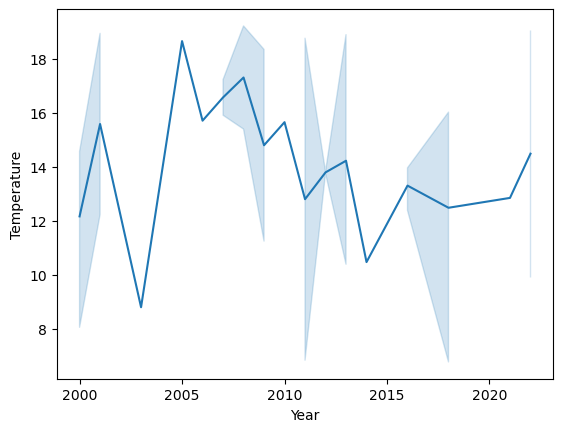

In [47]:
#lineplot showing mean temperature over years
sns.lineplot(data=temp_mean,x='Year',y='Temperature')
plt.show()

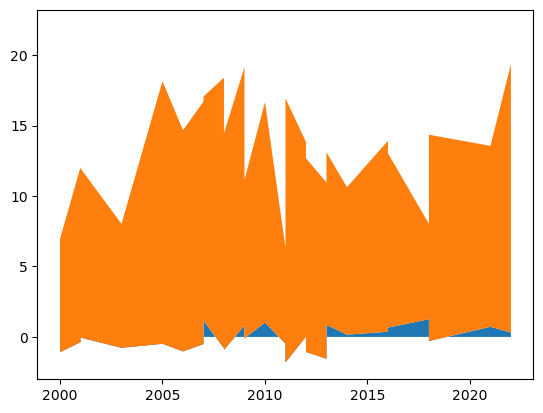

In [48]:
plt.stackplot(india_wise_data.Year,india_wise_data.Sea_Level_Rise, india_wise_data.Temperature)
plt.show()

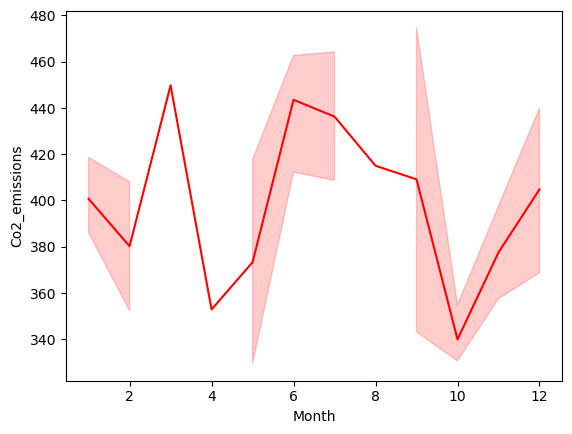

In [49]:
#lineplot depicting monthly wise co2 emission in india
sns.lineplot(data=india_wise_data,x='Month',y= 'Co2_emissions',color='red')
plt.show()

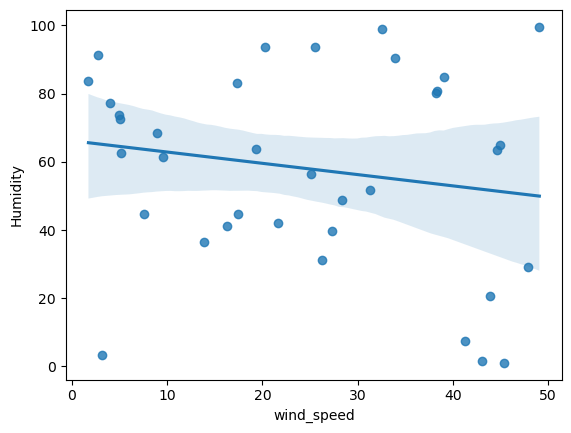

In [50]:
#lineplot depicting weak negative correlation between wind speed and humidity 
sns.regplot(data=india_wise_data,x='wind_speed',y='Humidity')
plt.show()

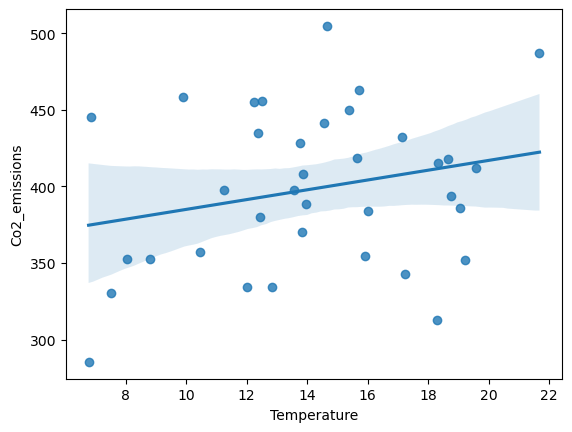

In [51]:
#lineplot depicting weak positive correlation between wind speed and humidity
sns.regplot(data=india_wise_data,x='Temperature',y='Co2_emissions')
plt.show()

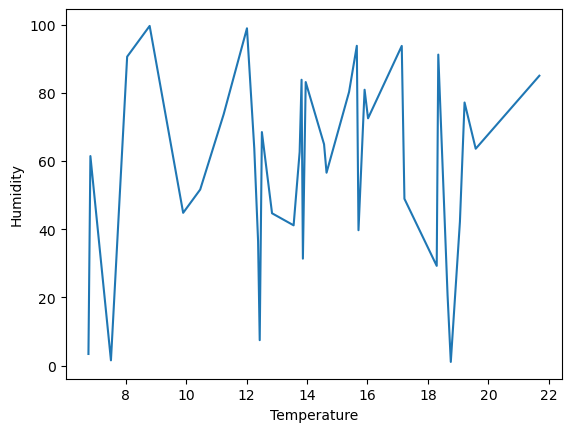

In [52]:
#lineplot depicting fluctuation between humidity and temperature
sns.lineplot(data=india_wise_data,x='Temperature',y='Humidity')
plt.show()

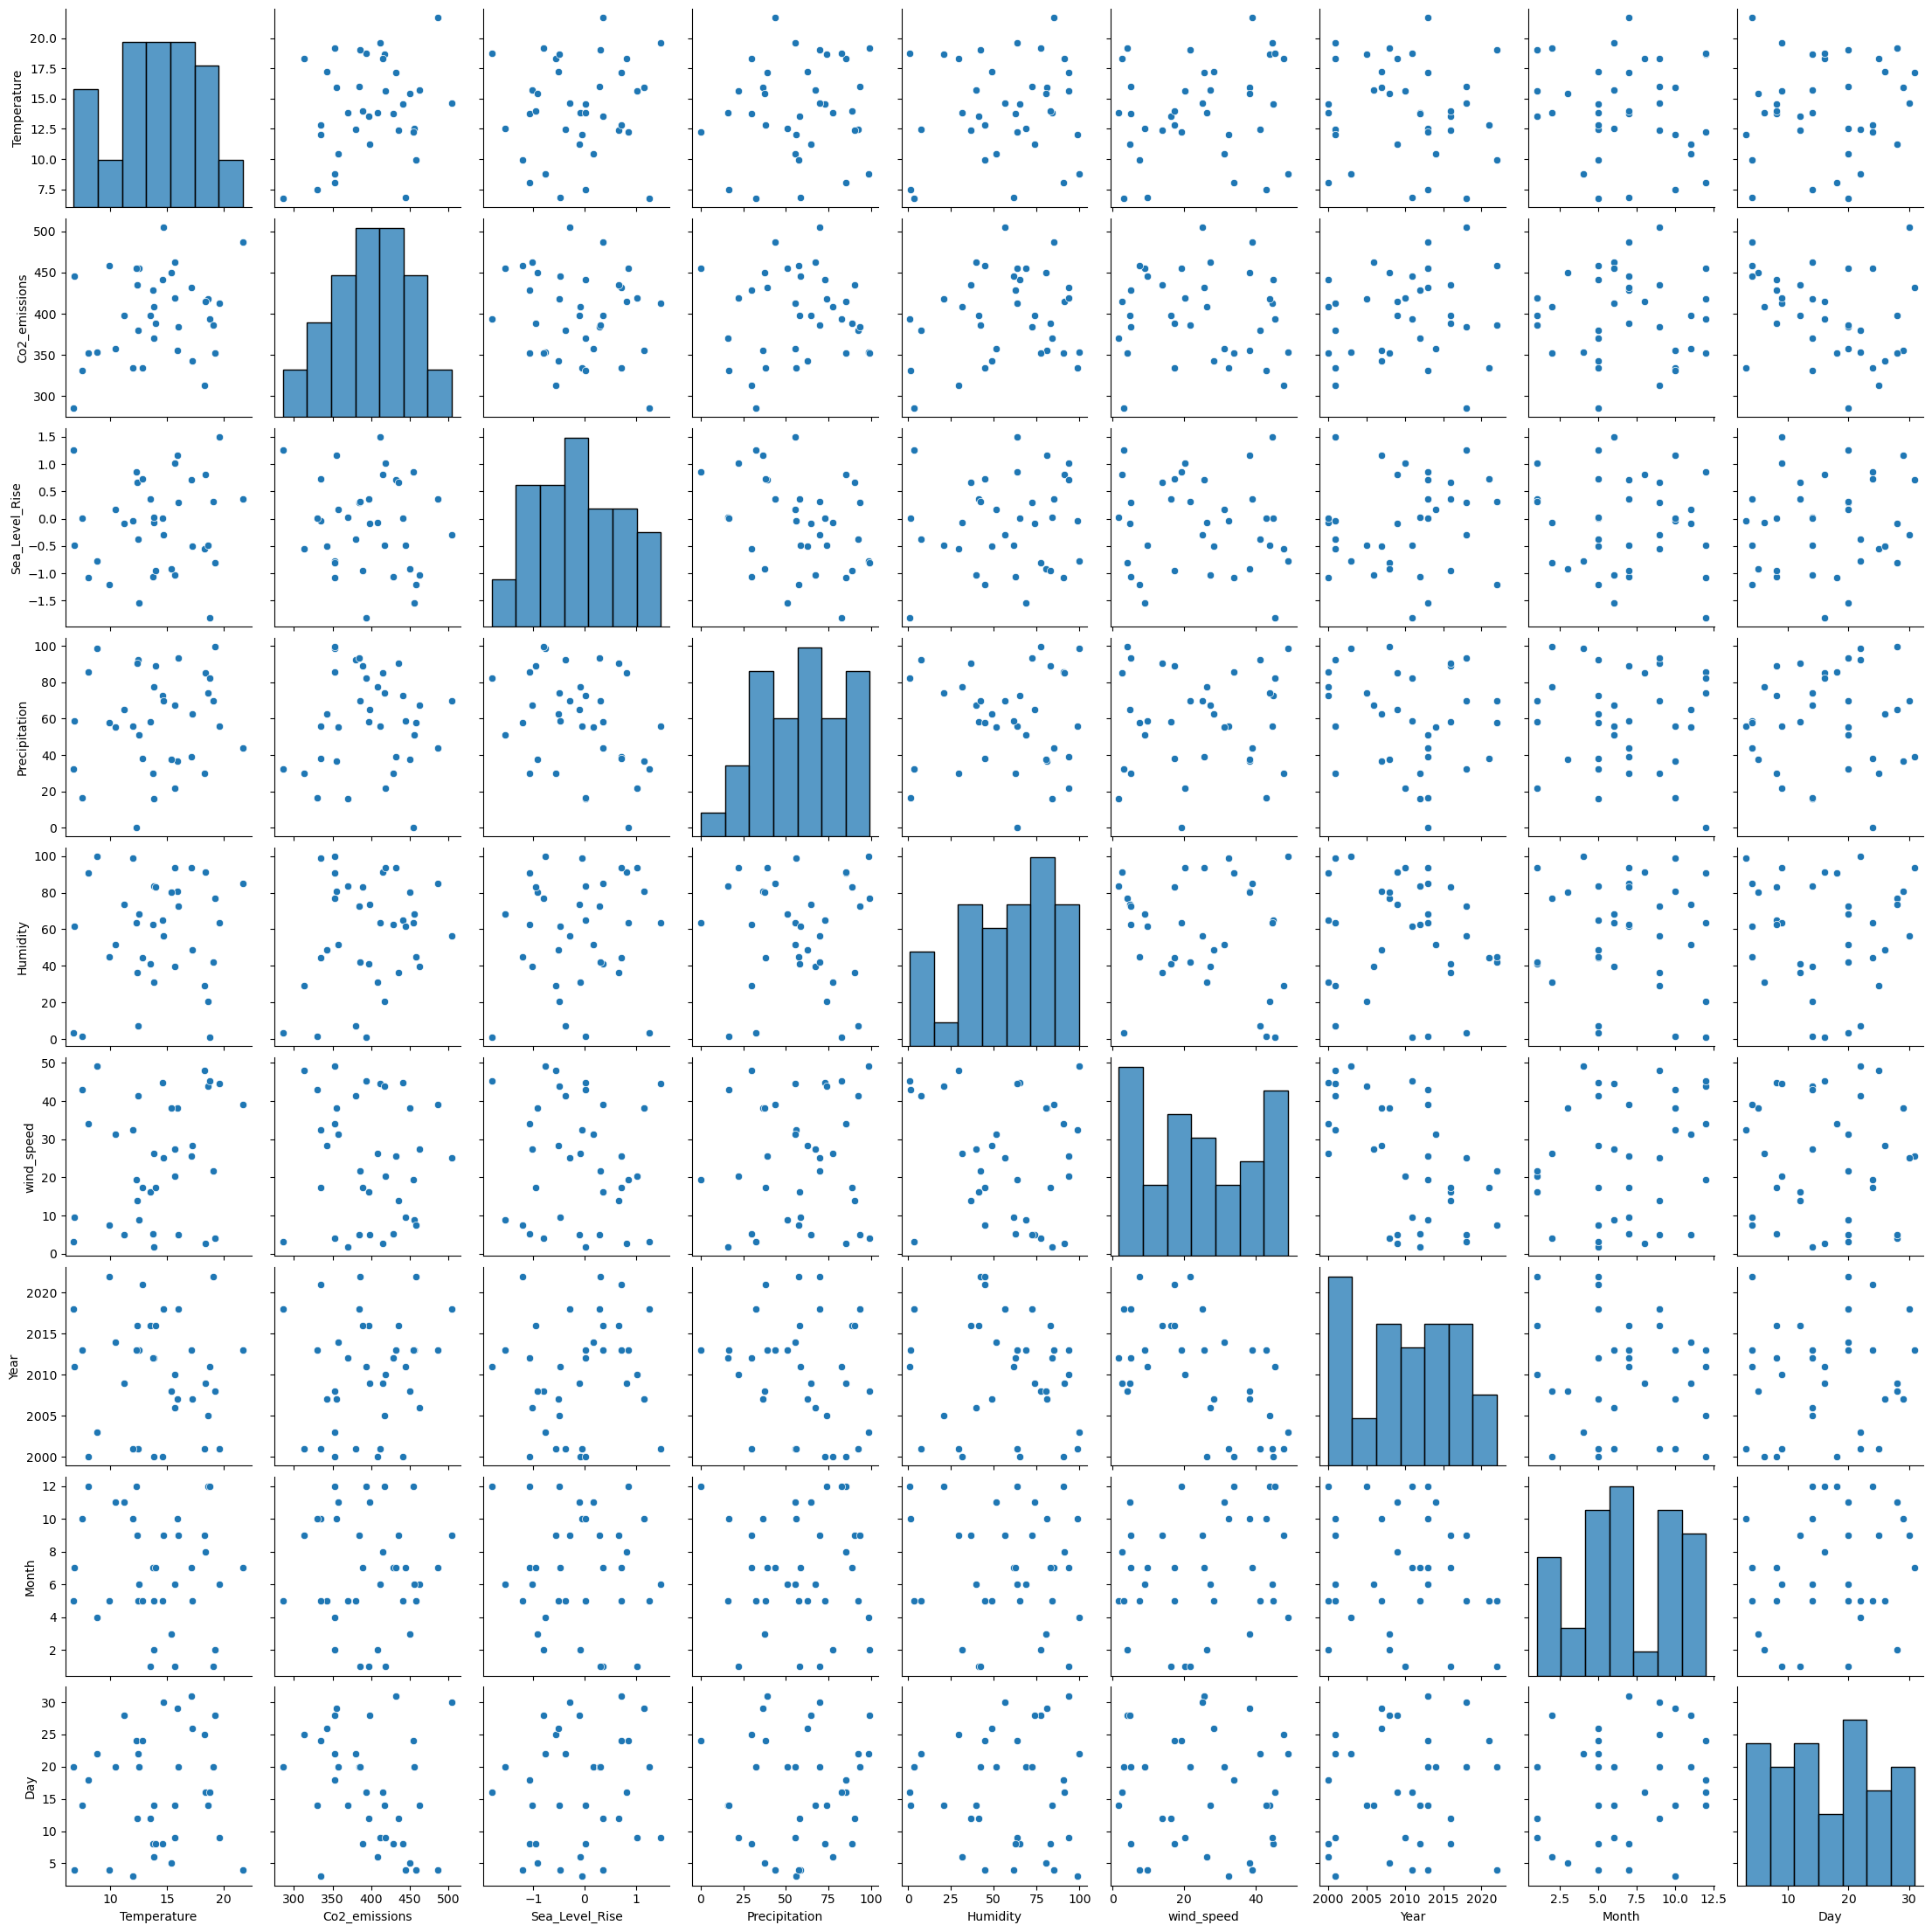

In [53]:
#pairplot 
sns.pairplot(data=india_wise_data)
plt.show()

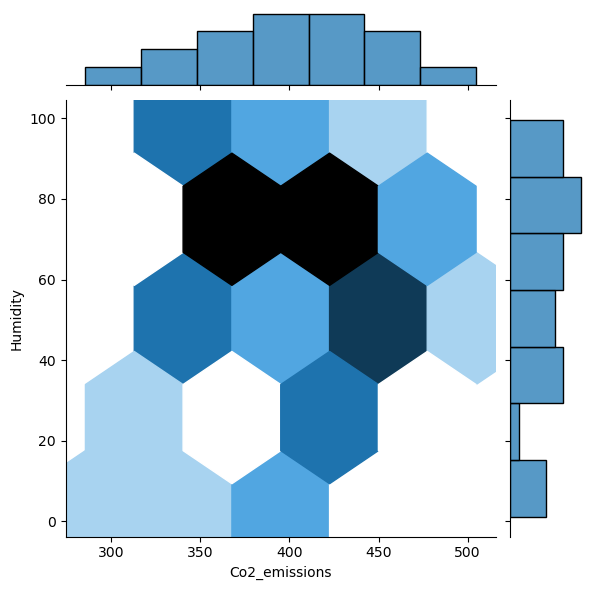

In [54]:
# joint plot to depict reation between Humidity and Co2 emission in India
sns.jointplot(data=india_wise_data, x='Co2_emissions',y='Humidity',kind='hex')
plt.show()

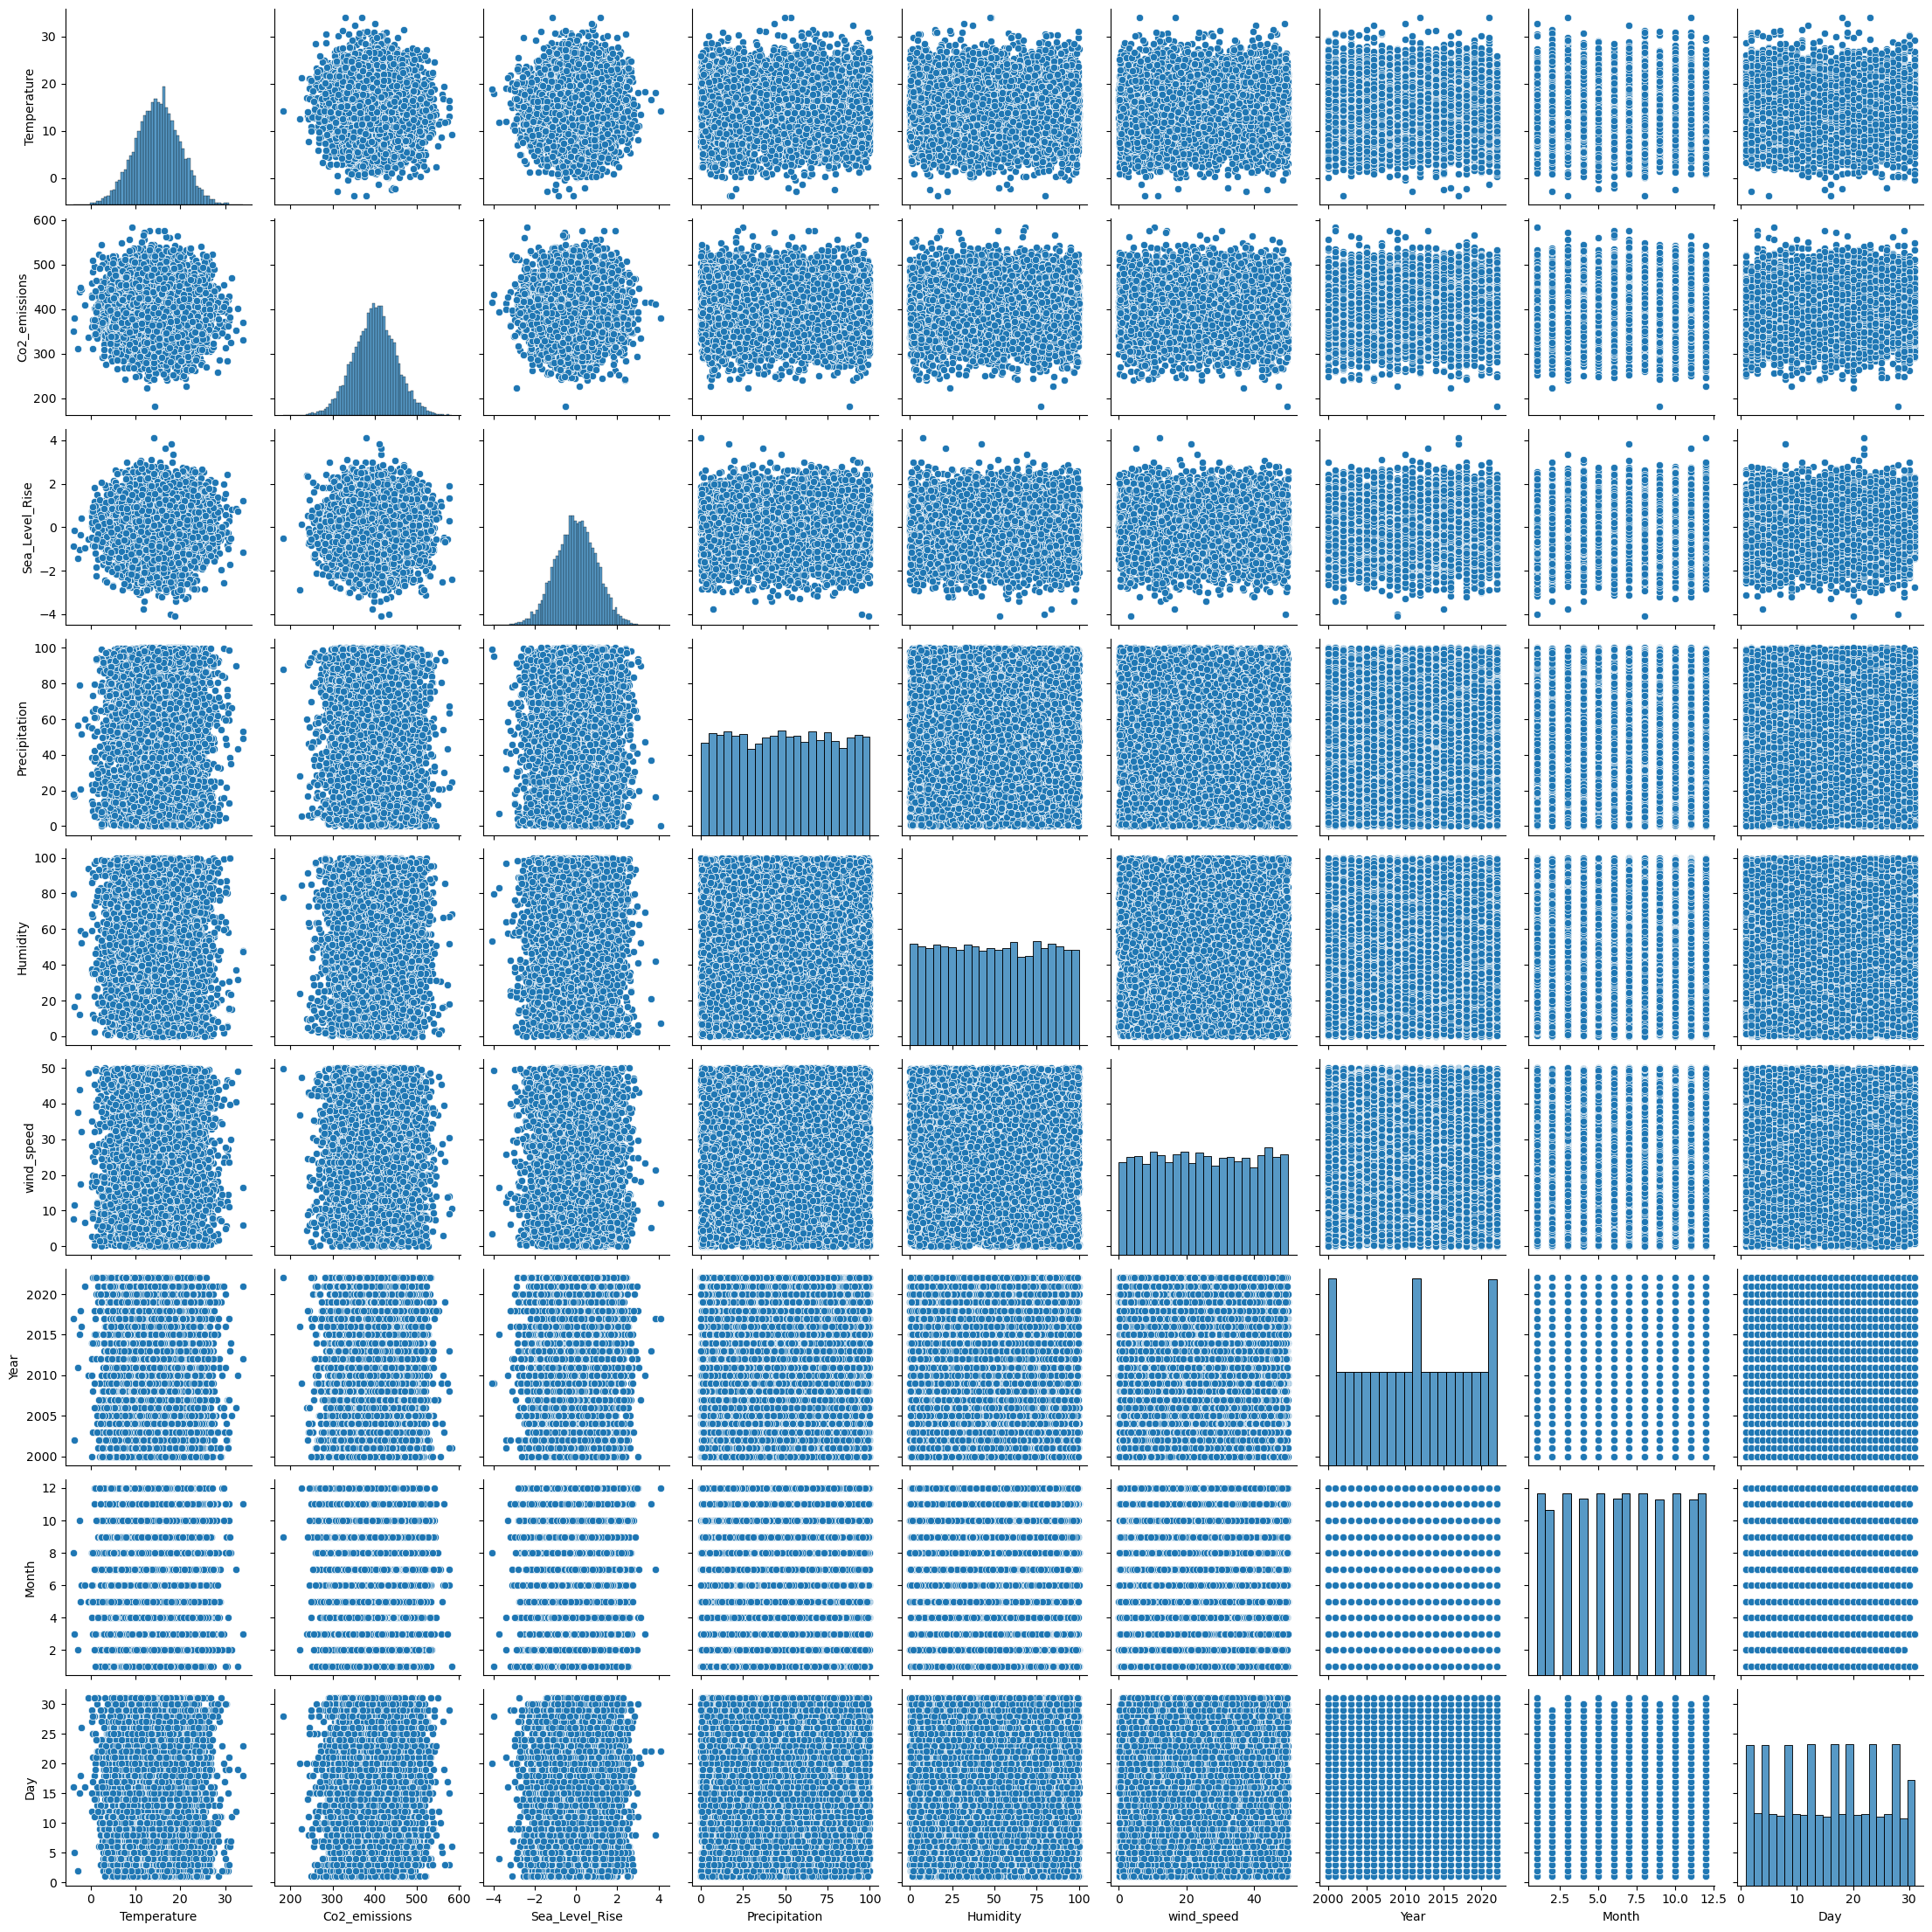

In [55]:
sns.pairplot(data=df)
plt.show()